In [1]:
import requests
import time 
import pandas as pd

from bs4 import BeautifulSoup

In [2]:
# I still worked with the renewablesm this data was also taked from OECD (https://data.oecd.org/energy/renewable-energy.htm#indicator-chart), 
# but I am not insisting on this topic:
all_renewables = pd.read_csv('C:/Users/zirav/Desktop/Accenture/My_final_project/renewable_capacity_timeseries.csv', encoding="UTF-8")
all_renewables.head()

,day,CH_bioenergy_capacity,CH_solar_capacity,CH_wind_onshore_capacity,DE_bioenergy_capacity,DE_geothermal_capacity,DE_solar_capacity,DE_wind_capacity,DE_wind_offshore_capacity,DE_wind_onshore_capacity,...,GB-UKM_bioenergy_capacity,GB-UKM_hydro_capacity,GB-UKM_marine_capacity,GB-UKM_solar_capacity,GB-UKM_wind_capacity,GB-UKM_wind_offshore_capacity,GB-UKM_wind_onshore_capacity,SE_wind_capacity,SE_wind_offshore_capacity,SE_wind_onshore_capacity
0,1900-01-01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1900-01-02,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1900-01-03,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1900-01-04,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1900-01-05,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# check the final part of the table
all_renewables.tail()

,day,CH_bioenergy_capacity,CH_solar_capacity,CH_wind_onshore_capacity,DE_bioenergy_capacity,DE_geothermal_capacity,DE_solar_capacity,DE_wind_capacity,DE_wind_offshore_capacity,DE_wind_onshore_capacity,...,GB-UKM_bioenergy_capacity,GB-UKM_hydro_capacity,GB-UKM_marine_capacity,GB-UKM_solar_capacity,GB-UKM_wind_capacity,GB-UKM_wind_offshore_capacity,GB-UKM_wind_onshore_capacity,SE_wind_capacity,SE_wind_offshore_capacity,SE_wind_onshore_capacity
44161,2020-11-28,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,...,6737.7,3442.6,34.5,8468.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01
44162,2020-11-29,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,...,6737.7,3442.6,34.5,8468.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01
44163,2020-11-30,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,...,6737.7,3442.6,34.5,8468.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01
44164,2020-12-01,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,...,6737.7,3442.6,34.5,8468.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01
44165,2020-12-02,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,...,6737.7,3442.6,34.5,8473.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01


In [4]:
all_renewables.shape
all_renewables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44166 entries, 0 to 44165
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   day                            44166 non-null  object 
 1   CH_bioenergy_capacity          44166 non-null  float64
 2   CH_solar_capacity              44166 non-null  float64
 3   CH_wind_onshore_capacity       44166 non-null  float64
 4   DE_bioenergy_capacity          44166 non-null  float64
 5   DE_geothermal_capacity         44166 non-null  float64
 6   DE_solar_capacity              44166 non-null  float64
 7   DE_wind_capacity               44166 non-null  float64
 8   DE_wind_offshore_capacity      44166 non-null  float64
 9   DE_wind_onshore_capacity       44166 non-null  float64
 10  DK_solar_capacity              44166 non-null  float64
 11  DK_wind_capacity               44166 non-null  float64
 12  DK_wind_offshore_capacity      44166 non-null 

In [5]:
# for further extracting year 
all_renewables.index = all_renewables.day
all_renewables.head()

,day,CH_bioenergy_capacity,CH_solar_capacity,CH_wind_onshore_capacity,DE_bioenergy_capacity,DE_geothermal_capacity,DE_solar_capacity,DE_wind_capacity,DE_wind_offshore_capacity,DE_wind_onshore_capacity,...,GB-UKM_bioenergy_capacity,GB-UKM_hydro_capacity,GB-UKM_marine_capacity,GB-UKM_solar_capacity,GB-UKM_wind_capacity,GB-UKM_wind_offshore_capacity,GB-UKM_wind_onshore_capacity,SE_wind_capacity,SE_wind_offshore_capacity,SE_wind_onshore_capacity
day,,,,,,,,,,,,,,,,,,,,,
1900-01-01,1900-01-01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900-01-02,1900-01-02,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900-01-03,1900-01-03,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900-01-04,1900-01-04,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900-01-05,1900-01-05,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
all_renewables['day']= pd.to_datetime(all_renewables['day'])
all_renewables.head()

,day,CH_bioenergy_capacity,CH_solar_capacity,CH_wind_onshore_capacity,DE_bioenergy_capacity,DE_geothermal_capacity,DE_solar_capacity,DE_wind_capacity,DE_wind_offshore_capacity,DE_wind_onshore_capacity,...,GB-UKM_bioenergy_capacity,GB-UKM_hydro_capacity,GB-UKM_marine_capacity,GB-UKM_solar_capacity,GB-UKM_wind_capacity,GB-UKM_wind_offshore_capacity,GB-UKM_wind_onshore_capacity,SE_wind_capacity,SE_wind_offshore_capacity,SE_wind_onshore_capacity
day,,,,,,,,,,,,,,,,,,,,,
1900-01-01,1900-01-01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900-01-02,1900-01-02,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900-01-03,1900-01-03,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900-01-04,1900-01-04,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900-01-05,1900-01-05,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# extracting year
all_renewables['year'] = pd.DatetimeIndex(all_renewables['day']).year
all_renewables.tail()

,day,CH_bioenergy_capacity,CH_solar_capacity,CH_wind_onshore_capacity,DE_bioenergy_capacity,DE_geothermal_capacity,DE_solar_capacity,DE_wind_capacity,DE_wind_offshore_capacity,DE_wind_onshore_capacity,...,GB-UKM_hydro_capacity,GB-UKM_marine_capacity,GB-UKM_solar_capacity,GB-UKM_wind_capacity,GB-UKM_wind_offshore_capacity,GB-UKM_wind_onshore_capacity,SE_wind_capacity,SE_wind_offshore_capacity,SE_wind_onshore_capacity,year
day,,,,,,,,,,,,,,,,,,,,,
2020-11-28,2020-11-28,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,...,3442.6,34.5,8468.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01,2020
2020-11-29,2020-11-29,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,...,3442.6,34.5,8468.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01,2020
2020-11-30,2020-11-30,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,...,3442.6,34.5,8468.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01,2020
2020-12-01,2020-12-01,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,...,3442.6,34.5,8468.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01,2020
2020-12-02,2020-12-02,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,...,3442.6,34.5,8473.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01,2020


In [18]:

all_renewables.loc['2020-01-01':'2020-12-02', 'CH_bioenergy_capacity':'SE_wind_onshore_capacity']

,CH_bioenergy_capacity,CH_solar_capacity,CH_wind_onshore_capacity,DE_bioenergy_capacity,DE_geothermal_capacity,DE_solar_capacity,DE_wind_capacity,DE_wind_offshore_capacity,DE_wind_onshore_capacity,DK_solar_capacity,...,GB-UKM_bioenergy_capacity,GB-UKM_hydro_capacity,GB-UKM_marine_capacity,GB-UKM_solar_capacity,GB-UKM_wind_capacity,GB-UKM_wind_offshore_capacity,GB-UKM_wind_onshore_capacity,SE_wind_capacity,SE_wind_offshore_capacity,SE_wind_onshore_capacity
day,,,,,,,,,,,,,,,,,,,,,
2020-01-01,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,547.432,...,6721.7,3442.6,34.5,8465.3,21790.1,8492.7,13297.4,8991.96,191.15,8800.81
2020-01-02,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,547.432,...,6721.7,3442.6,34.5,8465.3,21790.1,8492.7,13297.4,8991.96,191.15,8800.81
2020-01-03,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,547.432,...,6721.7,3442.6,34.5,8465.3,21820.0,8492.7,13327.3,8991.96,191.15,8800.81
2020-01-04,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,547.432,...,6721.7,3442.6,34.5,8466.3,21820.0,8492.7,13327.3,8991.96,191.15,8800.81
2020-01-05,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,547.432,...,6721.7,3442.6,34.5,8466.3,21820.0,8492.7,13327.3,8991.96,191.15,8800.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-28,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,547.432,...,6737.7,3442.6,34.5,8468.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01
2020-11-29,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,547.432,...,6737.7,3442.6,34.5,8468.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01
2020-11-30,87.165,620.399,64.173,8021.331,51.094,50508.38,50451.642,5741.634,44710.008,547.432,...,6737.7,3442.6,34.5,8468.3,23020.0,9692.7,13327.3,9514.16,191.15,9323.01


In [9]:
all_renewables.drop(all_renewables.index[1900-1-1:1980-12-31], axis=0, inplace=True)
all_renewables.head()

,day,CH_bioenergy_capacity,CH_solar_capacity,CH_wind_onshore_capacity,DE_bioenergy_capacity,DE_geothermal_capacity,DE_solar_capacity,DE_wind_capacity,DE_wind_offshore_capacity,DE_wind_onshore_capacity,...,GB-UKM_hydro_capacity,GB-UKM_marine_capacity,GB-UKM_solar_capacity,GB-UKM_wind_capacity,GB-UKM_wind_offshore_capacity,GB-UKM_wind_onshore_capacity,SE_wind_capacity,SE_wind_offshore_capacity,SE_wind_onshore_capacity,year
day,,,,,,,,,,,,,,,,,,,,,
1900-01-01,1900-01-01,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900
1900-01-02,1900-01-02,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900
1900-01-03,1900-01-03,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900
1900-01-04,1900-01-04,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900
1900-01-05,1900-01-05,0.0,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900


In [17]:
all_renewables.describe(include='all') 

C:\Users\zirav\AppData\Local\Temp\ipykernel_25880\2171457634.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  all_renewables.describe(include='all')


,day,CH_bioenergy_capacity,CH_solar_capacity,CH_wind_onshore_capacity,DE_bioenergy_capacity,DE_geothermal_capacity,DE_solar_capacity,DE_wind_capacity,DE_wind_offshore_capacity,DE_wind_onshore_capacity,...,GB-UKM_hydro_capacity,GB-UKM_marine_capacity,GB-UKM_solar_capacity,GB-UKM_wind_capacity,GB-UKM_wind_offshore_capacity,GB-UKM_wind_onshore_capacity,SE_wind_capacity,SE_wind_offshore_capacity,SE_wind_onshore_capacity,year
count,44127,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,...,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000,44127.000000
unique,44127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1900-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,1900-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-12-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.865608,39.403488,3.995944,869.149161,2.771695,3397.673421,3611.735855,189.018992,3422.716863,...,1293.724899,2.459039,390.820921,1358.597827,441.387162,917.210665,512.692006,18.102557,494.589449,1960.010538
std,NaN,21.345770,137.788240,13.828418,2203.826169,9.705973,10771.725843,9985.031096,858.258908,9238.007721,...,1415.121647,7.871437,1654.124007,4244.102553,1561.209432,2706.915919,1629.208387,52.237271,1581.012145,34.883467
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000
25%,NaN,0.000000,0.000000,0.000000,1.633000,0.000000,0.000000,0.000000,0.000000,0.000000,...,94.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1930.000000


<AxesSubplot: xlabel='year'>

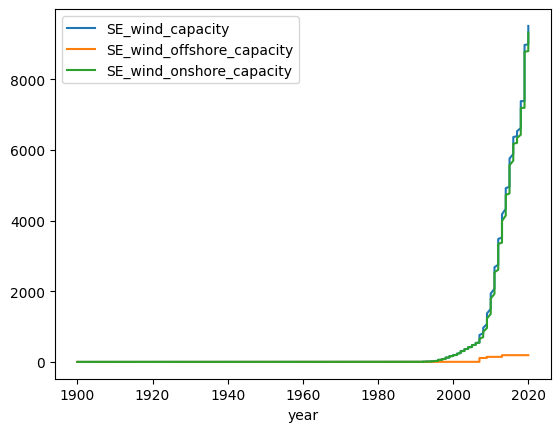

In [13]:
all_renewables.plot(x='year', y=['SE_wind_capacity', 'SE_wind_offshore_capacity', 'SE_wind_onshore_capacity'])

<AxesSubplot: xlabel='year'>

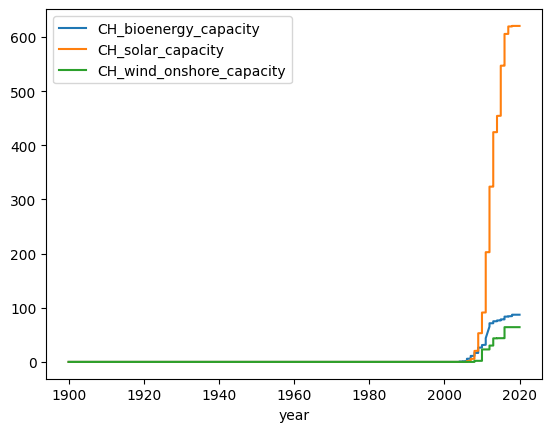

In [10]:
all_renewables.plot(x='year', y=['CH_bioenergy_capacity', 'CH_solar_capacity', 'CH_wind_onshore_capacity'])

<AxesSubplot: xlabel='year'>

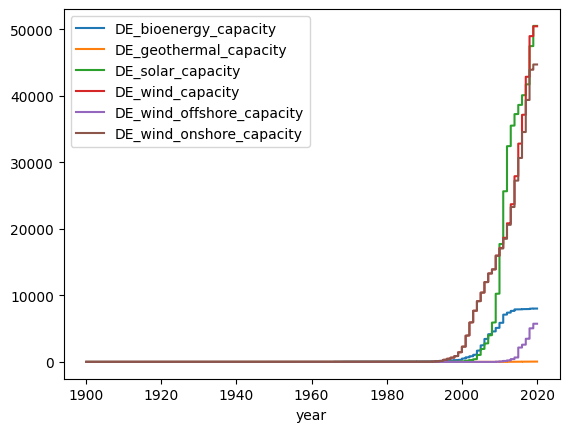

In [11]:
all_renewables.plot(x='year', y=['DE_bioenergy_capacity', 'DE_geothermal_capacity', 'DE_solar_capacity', 'DE_wind_capacity', 'DE_wind_offshore_capacity', 'DE_wind_onshore_capacity'])

<AxesSubplot: xlabel='year'>

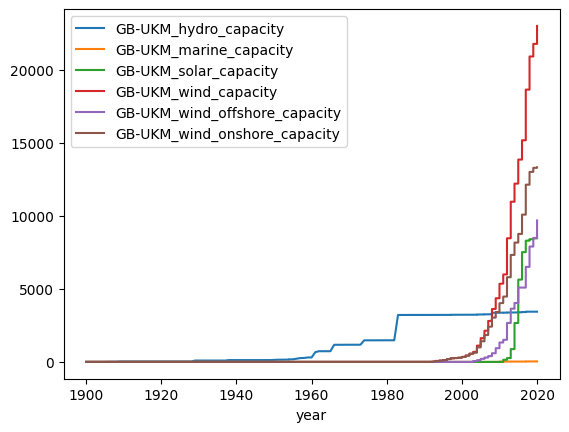

In [12]:
all_renewables.plot(x='year', y=['GB-UKM_hydro_capacity', 'GB-UKM_marine_capacity', 'GB-UKM_solar_capacity', 'GB-UKM_wind_capacity', 'GB-UKM_wind_offshore_capacity', 'GB-UKM_wind_onshore_capacity'])

<AxesSubplot: xlabel='year'>

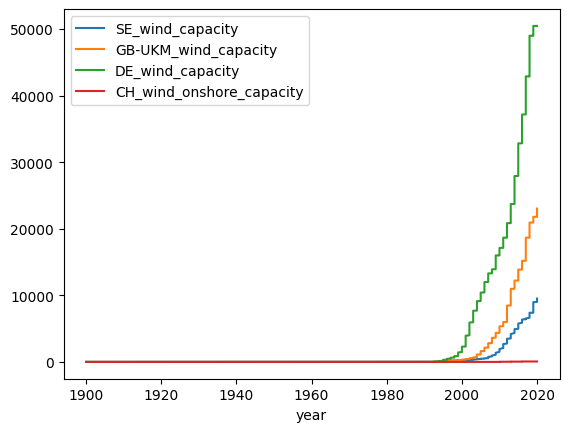

In [14]:
all_renewables.plot(x='year', y=['SE_wind_capacity', 'GB-UKM_wind_capacity', 'DE_wind_capacity', 'CH_wind_onshore_capacity'])

<AxesSubplot: xlabel='year'>

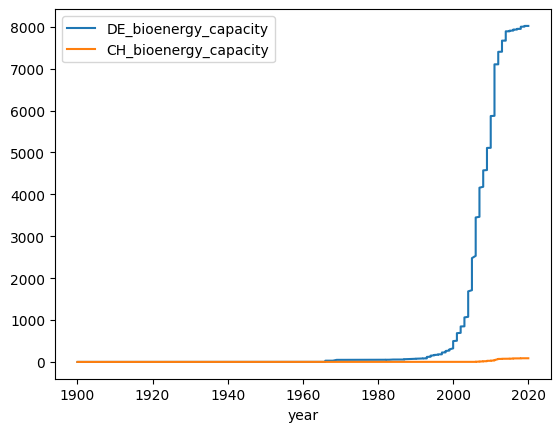

In [15]:
all_renewables.plot(x='year', y=['DE_bioenergy_capacity', 'CH_bioenergy_capacity'])

<AxesSubplot: xlabel='year'>

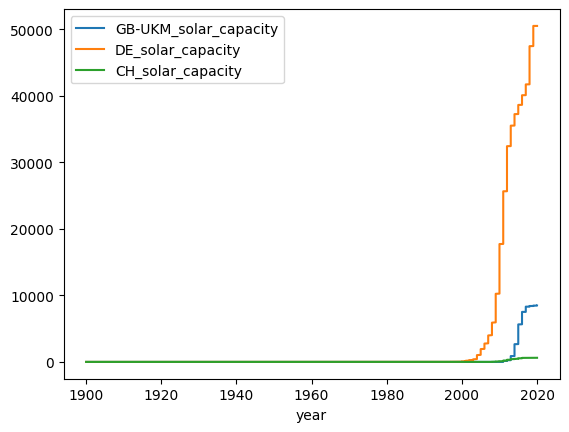

In [20]:
all_renewables.plot(x='year', y=['GB-UKM_solar_capacity', 'DE_solar_capacity', 'CH_solar_capacity'])